# Dictionary

## Column Description


* Booking_ID: Unique identifier of the booking.


* no_of_adults: The number of adults.


* no_of_children: The number of children.


* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday).


* no_of_week_nights: Number of week nights (Monday to Friday).


* type_of_meal_plan：Type of meal plan included in the booking.


* required_car_parking_space：Whether a car parking space is required.


* room_type_reserved：The type of room reserved.


* lead_time：Number of days before the arrival date the booking was made.


* arrival_year：Year of arrival.


* arrival_month：Month of arrival.


* arrival_date：Date of the month for arrival.


* market_segment_type：How the booking was made.


* repeated_guest：Whether the guest has previously stayed at the hotel.


* no_of_previous_cancellations：Number of previous cancellations.


* no_of_previous_bookings_not_canceled：Number of previous bookings that were canceled.


* avg_price_per_room：Average price per day of the booking.


* no_of_special_requests：Count of special requests made as part of the booking.


* booking_status：Whether the booking was cancelled or not.

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset


In [41]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import feature engineering libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Part 1: Import Dataset

In [2]:
df = pd.read_csv('/Users/shiyini/Desktop/YorkU Schulich💚/Term 1/MBAN 6110 S/Group Project/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Part 2: Data Wrangling

## Check the basic information about the dataset

In [3]:
df.shape

(36275, 19)

The dataset has 36275 rows and 19 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

From above, we can see that there are no missing values within all columns.

Next, we check the datatype of each column.

In [5]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

Check the statistic information about this dataset.

In [6]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


Since the `Booking_ID` is a unique characteristic, it will not help us in further prediction. Therefore, we decide to drop this column.

In [7]:
df.drop(['Booking_ID'], axis=1, inplace=True)

In [8]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Part 3: EDA

First, we check the rough distributions of the variables.

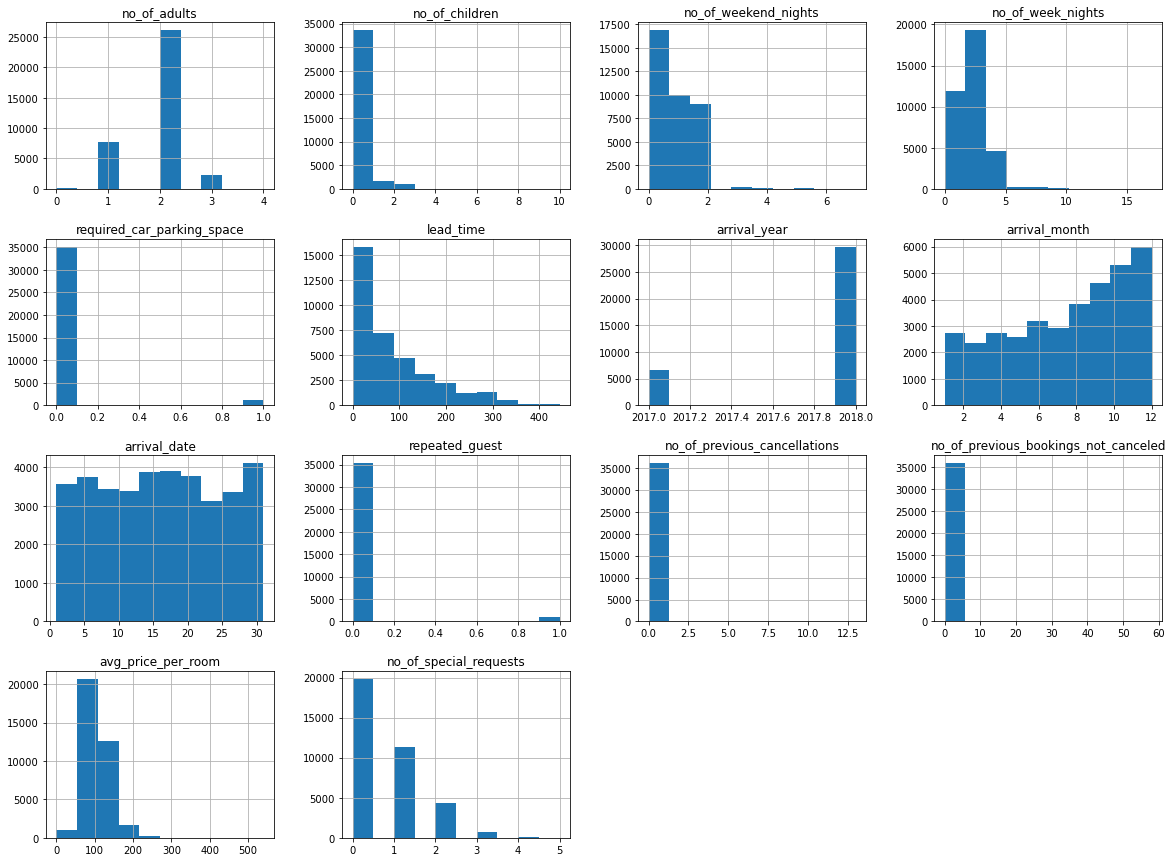

In [9]:
df.hist(figsize=(20,15))
plt.show()

Then we are going to distinguish the discrete and continuous variables. We compare the unique values in each column with a threshold. If it is greater than the threshold, it means the variable is continuous, otherwise, it is a discrete variable.

In [10]:
cols = df.columns
cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:

print(f"The unique values in `no_of_adults`: {df['no_of_adults'].unique()}; Total: {df['no_of_adults'].nunique()}")
print(f"The unique values in `no_of_children`: {df['no_of_children'].unique()}; Total: {df['no_of_children'].nunique()}")
print(f"The unique values in `no_of_weekend_nights`: {df['no_of_weekend_nights'].unique()}; Total: {df['no_of_weekend_nights'].nunique()}")
print(f"The unique values in `no_of_week_nights`: {df['no_of_week_nights'].unique()}; Total: {df['no_of_week_nights'].nunique()}")
print(f"The unique values in `type_of_meal_plan`: {df['type_of_meal_plan'].unique()}; Total: {df['type_of_meal_plan'].nunique()}")
print(f"The unique values in `required_car_parking_space`: {df['required_car_parking_space'].unique()}; Total: {df['required_car_parking_space'].nunique()}")
print(f"The unique values in `room_type_reserved`: {df['room_type_reserved'].unique()}; Total: {df['room_type_reserved'].nunique()}")
print(f"The unique values in `lead_time`: {df['lead_time'].unique()}; Total: {df['lead_time'].nunique()}")

The unique values in `no_of_adults`: [2 1 3 0 4]; Total: 5
The unique values in `no_of_children`: [ 0  2  1  3 10  9]; Total: 6
The unique values in `no_of_weekend_nights`: [1 2 0 4 3 6 5 7]; Total: 8
The unique values in `no_of_week_nights`: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]; Total: 18
The unique values in `type_of_meal_plan`: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']; Total: 4
The unique values in `required_car_parking_space`: [0 1]; Total: 2
The unique values in `room_type_reserved`: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']; Total: 7
The unique values in `lead_time`: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182

In [12]:
print(f"The unique values in `arrival_year`: {df['arrival_year'].unique()}; Total: {df['arrival_year'].nunique()}")
print(f"The unique values in `arrival_month`: {df['arrival_month'].unique()}; Total: {df['arrival_month'].nunique()}")
print(f"The unique values in `arrival_date`: {df['arrival_date'].unique()}; Total: {df['arrival_date'].nunique()}")
print(f"The unique values in `market_segment_type`: {df['market_segment_type'].unique()}; Total: {df['market_segment_type'].nunique()}")
print(f"The unique values in `repeated_guest`: {df['repeated_guest'].unique()}; Total: {df['repeated_guest'].nunique()}")
print(f"The unique values in `no_of_previous_cancellations`: {df['no_of_previous_cancellations'].unique()}; Total: {df['no_of_previous_bookings_not_canceled'].nunique()}")
print(f"The unique values in `no_of_previous_bookings_not_canceled`: {df['no_of_previous_bookings_not_canceled'].unique()}; Total: {df['no_of_previous_bookings_not_canceled'].nunique()}")
print(f"The unique values in `avg_price_per_room`: {df['avg_price_per_room'].unique()}; Total: {df['avg_price_per_room'].nunique()}")
print(f"The unique values in `no_of_special_requests`: {df['no_of_special_requests'].unique()}; Total: {df['no_of_special_requests'].nunique()}")
print(f"The unique values in `booking_status`: {df['booking_status'].unique()}; Total: {df['booking_status'].nunique()}")

The unique values in `arrival_year`: [2017 2018]; Total: 2
The unique values in `arrival_month`: [10 11  2  5  4  9 12  7  6  8  3  1]; Total: 12
The unique values in `arrival_date`: [ 2  6 28 20 11 13 15 26 18 30  5 10  4 25 22 21 19 17  7  9 27  1 29 16
  3 24 14 31 23  8 12]; Total: 31
The unique values in `market_segment_type`: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']; Total: 5
The unique values in `repeated_guest`: [0 1]; Total: 2
The unique values in `no_of_previous_cancellations`: [ 0  3  1  2 11  4  5 13  6]; Total: 59
The unique values in `no_of_previous_bookings_not_canceled`: [ 0  5  1  3  4 12 19  2 15 17  7 20 16 50 13  6 14 34 18  8 10 23 11 49
 47 53  9 33 22 24 52 21 48 28 39 25 31 38 26 51 42 37 35 56 44 27 32 55
 45 30 57 46 54 43 58 41 29 40 36]; Total: 59
The unique values in `avg_price_per_room`: [ 65.   106.68  60.   ... 118.43 137.25 167.8 ]; Total: 3930
The unique values in `no_of_special_requests`: [0 1 3 2 4 5]; Total: 6
The unique values in

From the results, we can see that:



*   **Categorical variables:**

  'no_of_children',

  'type_of_meal_plan',

  'required_car_parking_space',

  'room_type_reserved',

  'arrival_year',

  'arrival_month',

  'arrival_date',
  
  'market_segment_type',

  'repeated_guest',

  'booking_status'
  
*  **Numerical variables:**

  'no_of_adults',

  'no_of_weekend_nights',
  
  'no_of_week_nights',

  'lead_time',

  'no_of_previous_cancellations',

  'no_of_previous_bookings_not_canceled',

  'avg_price_per_room',

  'no_of_special_requests'


In [13]:
cat_cols = ['no_of_children', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
            'market_segment_type', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [14]:
cat_cols, num_cols

(['no_of_children',
  'type_of_meal_plan',
  'required_car_parking_space',
  'room_type_reserved',
  'arrival_year',
  'arrival_month',
  'arrival_date',
  'market_segment_type',
  'repeated_guest',
  'booking_status'],
 ['no_of_adults',
  'no_of_weekend_nights',
  'no_of_week_nights',
  'lead_time',
  'no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room',
  'no_of_special_requests'])

## Visualize the variables

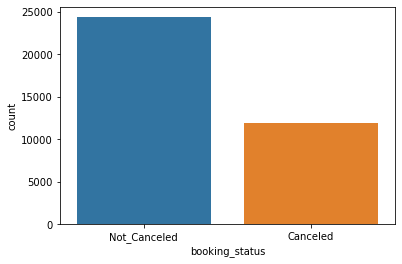

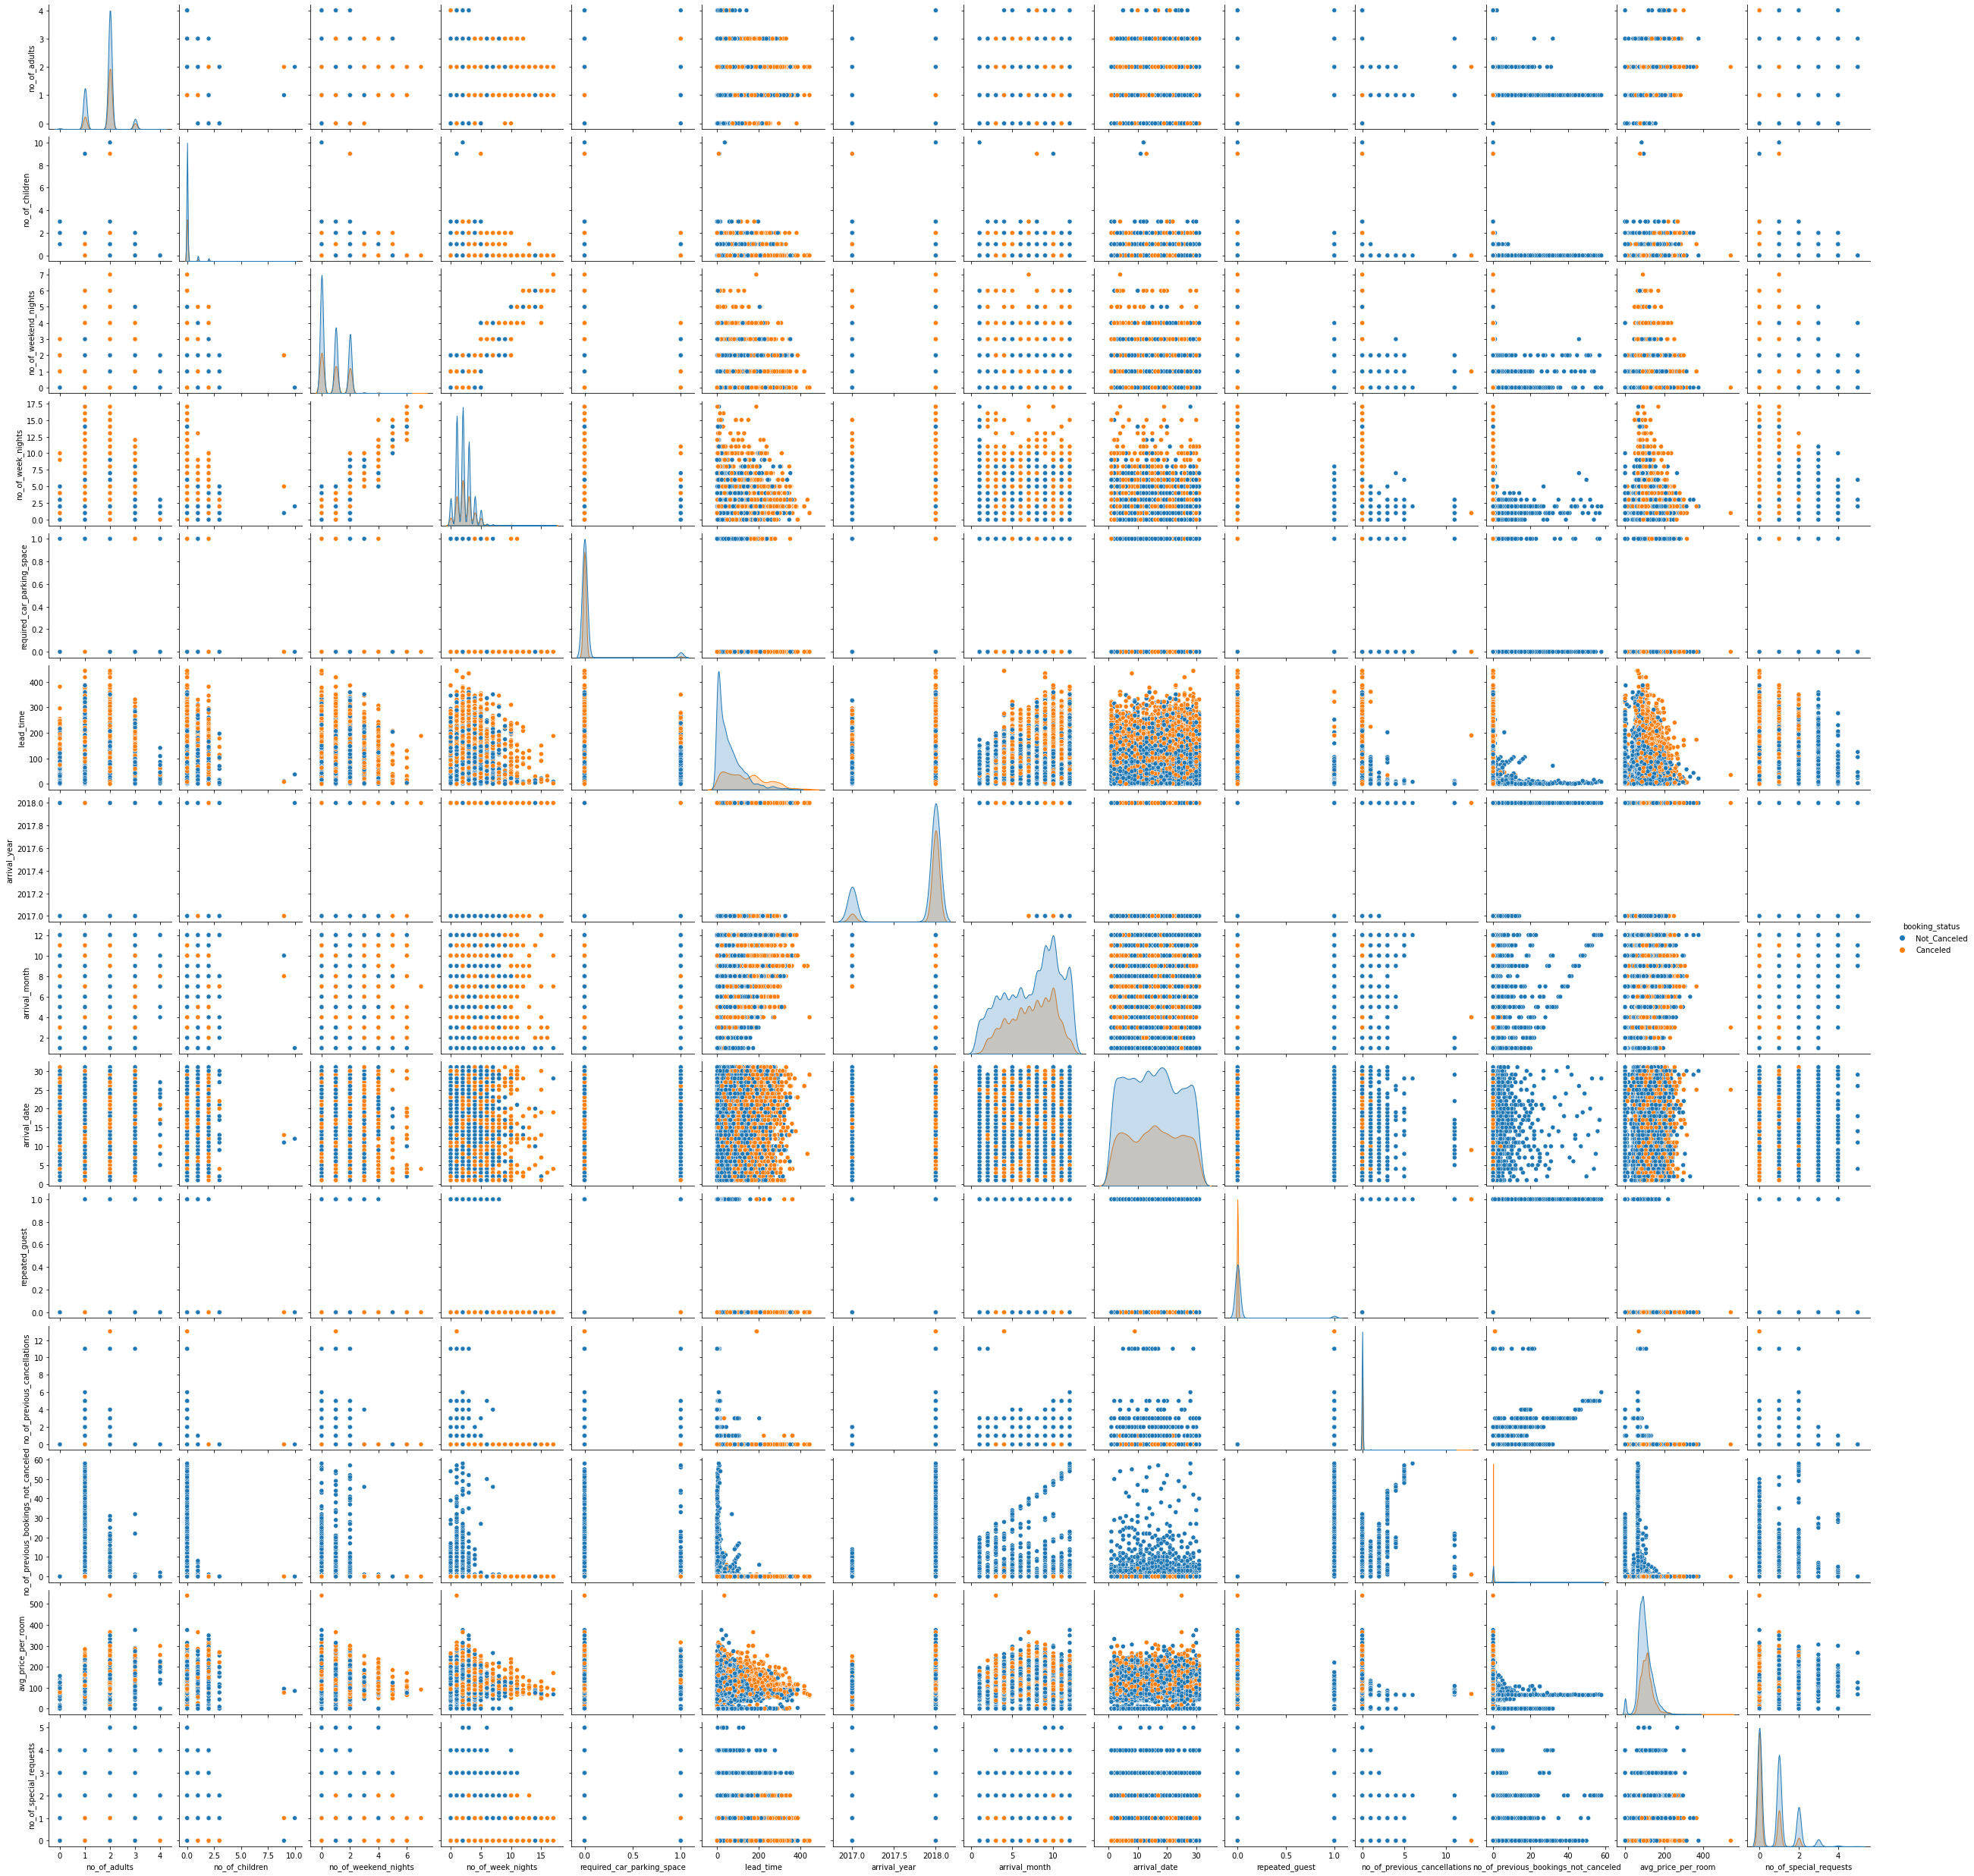

In [15]:
sns.countplot(x='booking_status', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='booking_status')
plt.show()

Check the detaied plot of each variable.

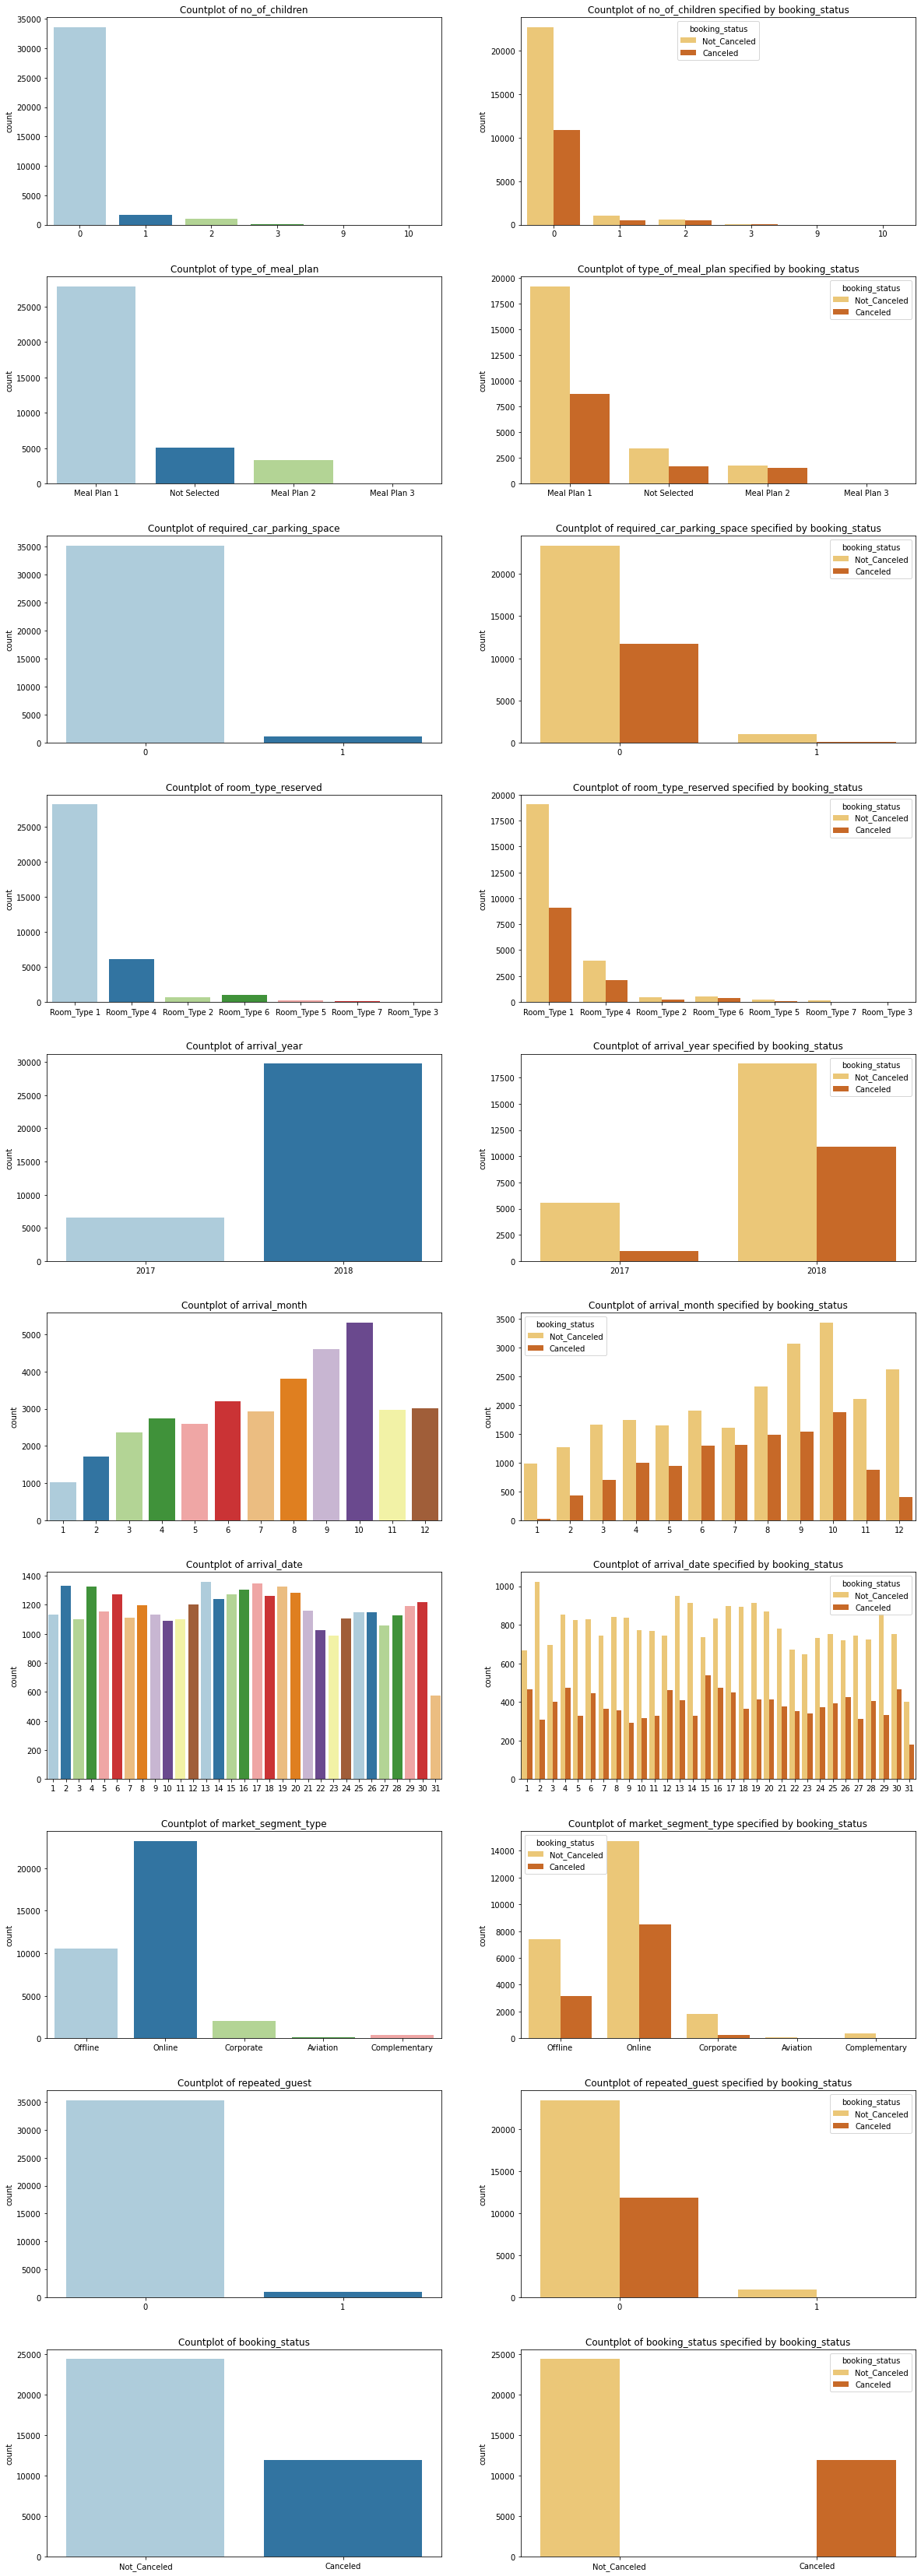

In [16]:
# Visualize categorical variable
def visualizations_cat(df: pd.DataFrame):

    fig, axes = plt.subplots(nrows=len(cat_cols), ncols=2, figsize=(20, 6 * len(cat_cols)))
    fig.subplots_adjust(hspace=0.25)
    
    for index, column in enumerate(cat_cols):

        sns.countplot(data=df, x=column, ax=axes[index, 0], palette="Paired")
        axes[index, 0].set_title(f"Countplot of {column}")
        axes[index, 0].set_xlabel("")

        sns.countplot(data=df, x=column, hue='booking_status', ax=axes[index, 1], palette="YlOrBr")
        axes[index, 1].set_title(f"Countplot of {column} specified by {'booking_status'}")
        axes[index, 1].set_xlabel("")  

    plt.show()

visualizations_cat(df)

Based on the graphs above, we can find that **the number of special reservations** is an indicator of booking status. The proportion of canceled reservations decreases as the number of requests increases.

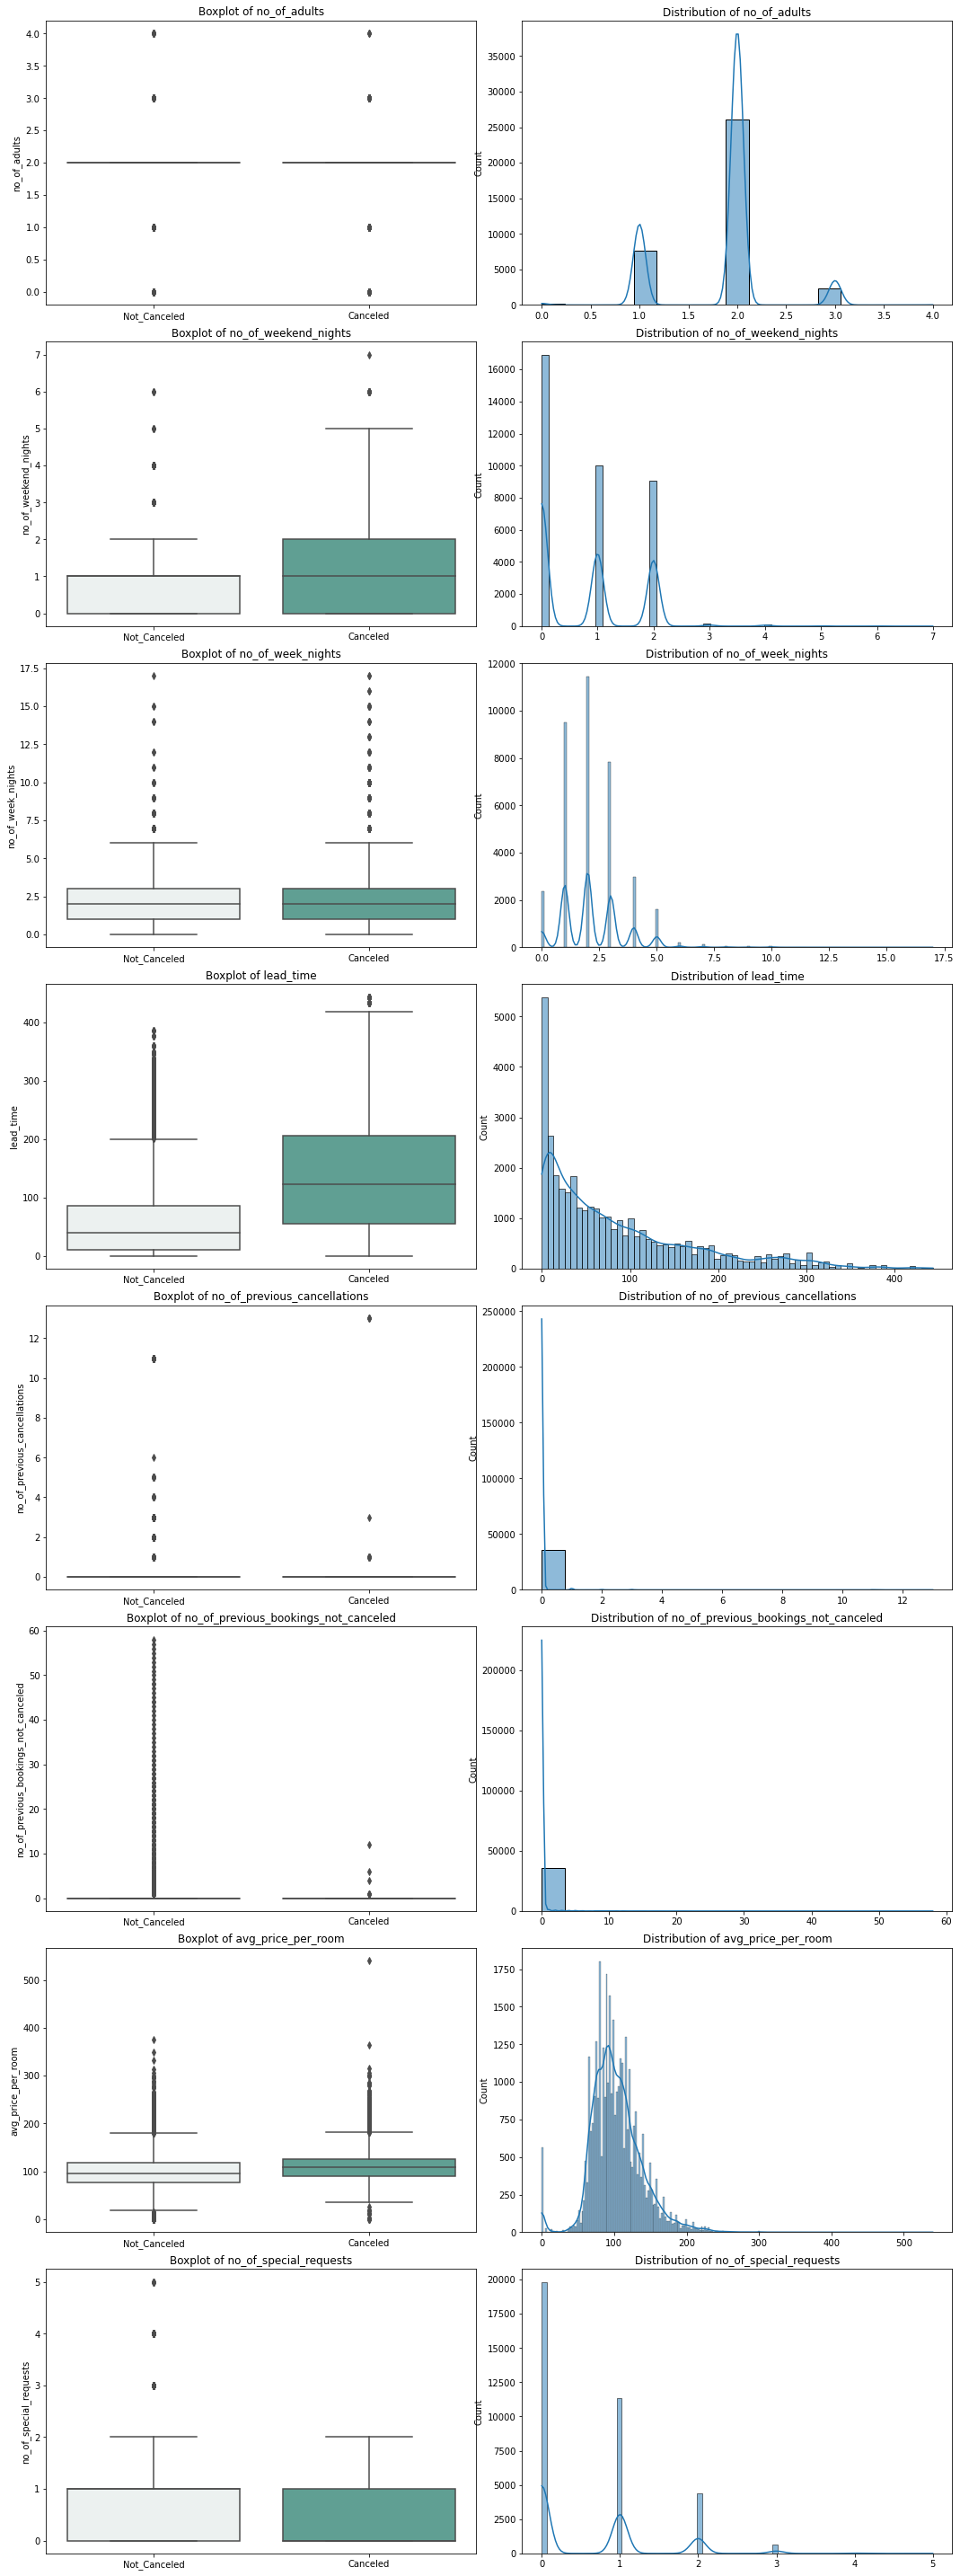

In [17]:
def visualizations_num(df: pd.DataFrame, target: str):
    
    fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(15, 5 * len(num_cols)))
    fig.tight_layout(pad=2.0)

    for index, column in enumerate(num_cols):

        sns.boxplot(data=df, x='booking_status', y=column, ax=axes[index, 0], palette="light:#5A9")
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")
        
    plt.show()

visualizations_num(df, target='booking_status')

From the graphs above, we can see that `no_of_weekend_nights` and `lead time` are indicators of booking status.
* The proportion of canceled reservations increases as the number of weekend nights increases.
* The proportion of canceled reservations increases as the lead time increases.

From the boxplot, we can see that there are many outliers. Next, let's deal with the outliers.

## Outliers

Drop

In [18]:
def drop_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    for column in num_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Drop the rows containing outliers
        df = df[~outliers]

    return df

In [19]:
df = drop_outliers(df)
df.shape

(23187, 18)

Replace

In [20]:
# For continuous variables, we use mean to replace the outliers.
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    
    for column in num_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()

    return df

In [21]:
df = replace_outliers(df)

Check the distributions again.

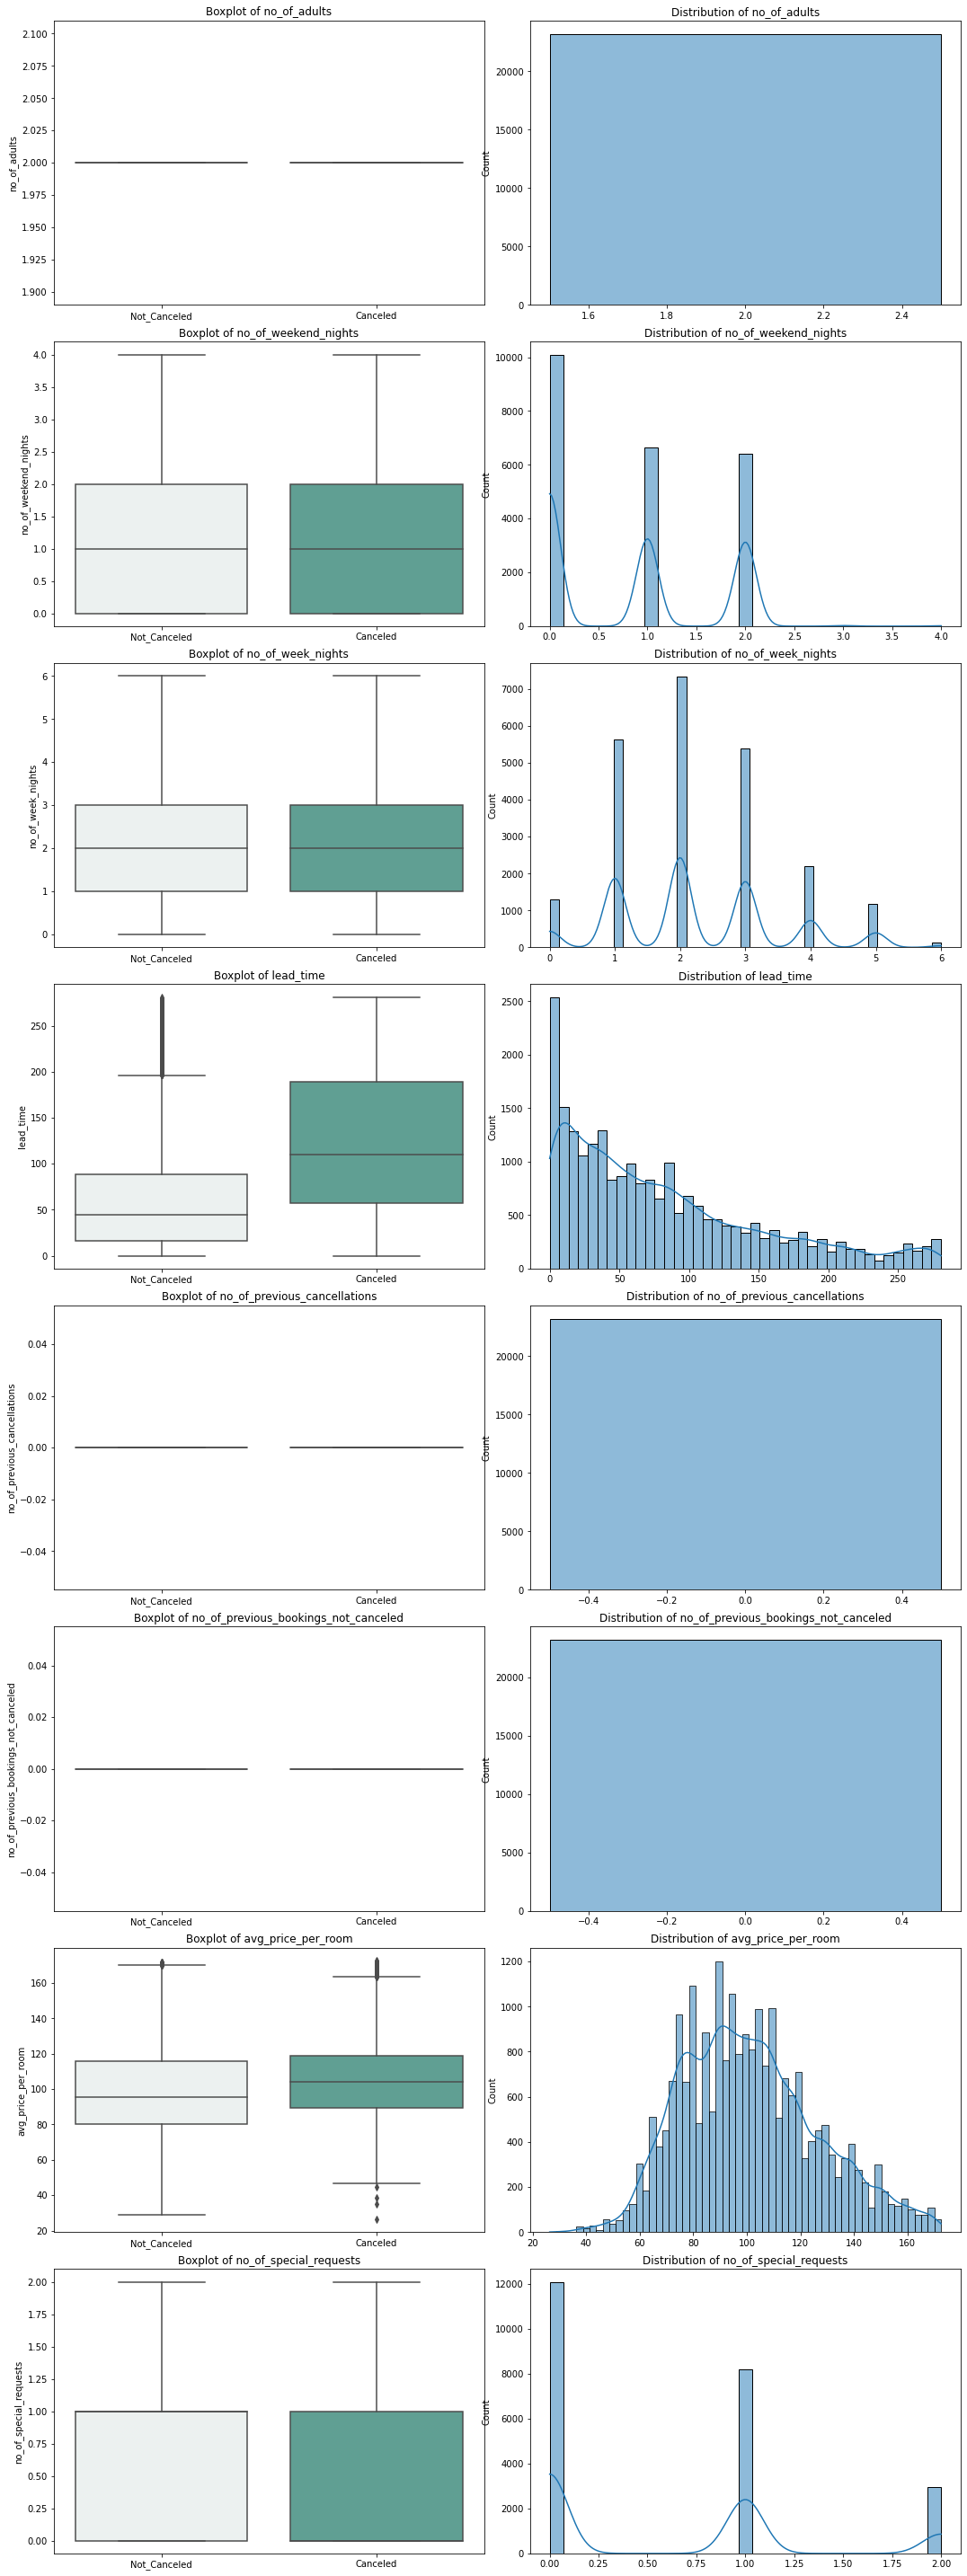

In [22]:
# Replot the boxplots
visualizations_num(df, target='booking_status')

In [23]:
df.shape

(23187, 18)

Now the distribution looks better.

# Part 4: Feature Engineering

Convert categorical values into numeric values.

In [24]:
def children(x):
    if x != 0:
        return 1
    elif x == 0:
        return 0

In [25]:
df['no_of_children'] = df['no_of_children'].apply(children)
df['no_of_children'].value_counts()

0    21553
1     1634
Name: no_of_children, dtype: int64

In [26]:
def type_of_meal_plan(x):
    if x == 'Meal Plan 1':
        return 1
    elif x == 'Meal Plan 2':
        return 2
    elif x == 'Meal Plan 3':
        return 3
    elif x == 'Not Selected':
        return 4

In [27]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].apply(type_of_meal_plan)
df['type_of_meal_plan'].value_counts()

1    16870
4     4235
2     2082
Name: type_of_meal_plan, dtype: int64

In [28]:
def room_type(x):
    if x == 'Room_Type 1':
        return 1
    elif x == 'Room_Type 2':
        return 2
    elif x == 'Room_Type 3':
        return 3
    elif x == 'Room_Type 4':
        return 4
    elif x == 'Room_Type 5':
        return 5
    elif x == 'Room_Type 6':
        return 6
    elif x == 'Room_Type 7':
        return 7


In [29]:
df['room_type_reserved'] = df['room_type_reserved'].apply(room_type)
df['room_type_reserved'].value_counts()

1    18805
4     3458
2      473
6      329
5      108
7       10
3        4
Name: room_type_reserved, dtype: int64

In [30]:
df['market_segment_type'].value_counts()

Online           16094
Offline           6703
Corporate          383
Complementary        6
Aviation             1
Name: market_segment_type, dtype: int64

In [31]:
def market_segment(x):
    if x == 'Online':
        return 1
    elif x == 'Offline':
        return 2
    elif x == 'Corporate':
        return 3
    elif x == 'Complementary':
        return 4
    elif x == 'Aviation':
        return 5

In [32]:
df['market_segment_type'] = df['market_segment_type'].apply(market_segment)
df['market_segment_type'].value_counts()

1    16094
2     6703
3      383
4        6
5        1
Name: market_segment_type, dtype: int64

In [33]:
def booking_status(x):
    if x == 'Canceled':
        return 1
    elif x == 'Not_Canceled':
        return 0

In [34]:
df['booking_status'] = df['booking_status'].apply(booking_status)
df['booking_status'].value_counts()

0    15385
1     7802
Name: booking_status, dtype: int64

In [35]:
cat = ['no_of_children', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
            'market_segment_type', 'repeated_guest']
num = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

First, build pipeline.

In [36]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat),
                                                 ('num', num_transformer, num)])

Split training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[cat+num], df['booking_status'], test_size=0.3, random_state=1)

In [38]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [39]:
X_train_transformed.shape

(16230, 73)

In [40]:
X_test_transformed.shape

(6957, 73)

# Part 5: Modelling Developing

## 1. Logistic Regression

In [67]:
log = LogisticRegression(max_iter=1000)

log_reg = log.fit(X_train_transformed, y_train)
y_pred_log = log.predict(X_test_transformed)

See the results:

In [68]:
cv_scores_log = cross_val_score(log, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for logistic regression: {round(cv_scores_log.mean(), 3)}.")

Cross-validation scores for logistic regression: 0.858.


In [69]:
matrix_log = confusion_matrix(y_test, y_pred_log)
matrix_log

array([[4060,  527],
       [ 921, 1449]])

In [70]:
accuracy_log = round(accuracy_score(y_test, y_pred_log), 3)
recall_log = round(recall_score(y_test, y_pred_log), 3)
precision_log = round(precision_score(y_test, y_pred_log), 3)
f1_log = round(f1_score(y_test, y_pred_log), 3)

print(f"The accuracy of logistic regression is {accuracy_log}.")
print(f"The recall of logistic regression is {recall_log}.")
print(f"The precission of logistic regression is {precision_log}.")
print(f"The f1 of logistic regression is {f1_log}.")

The accuracy of logistic regression is 0.792.
The recall of logistic regression is 0.611.
The precission of logistic regression is 0.733.
The f1 of logistic regression is 0.667.


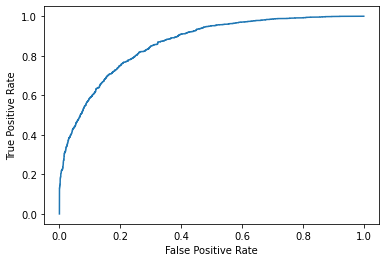

In [71]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log.predict_proba(X_test_transformed)[:,1])

plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [72]:
gmeans_log = np.sqrt(tpr_log*(1-fpr_log))
gmeans_log

array([0.        , 0.0205412 , 0.0355784 , ..., 0.05323623, 0.04897021,
       0.        ])

In [73]:
thresholds_log[np.argmax(gmeans_log)]

0.34058876451862297

## 2. Gaussian Naive Bayes

In [74]:
nb = GaussianNB()

nb_model = nb.fit(X_train_transformed.toarray(), y_train)
y_pred_nb = nb.predict(X_test_transformed.toarray())

In [75]:
# Cross-validation for NB
cv_scores_nb = cross_val_score(nb, X_train_transformed.toarray(), y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_nb.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.722.


In [76]:
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
recall_nb = round(recall_score(y_test, y_pred_nb), 3)
precision_nb = round(precision_score(y_test, y_pred_nb), 3)
f1_nb = round(f1_score(y_test, y_pred_nb), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb}.")

The accuracy of Gaussian Naive Bayes is 0.393.
The recall of Gaussian Naive Bayes is 0.976.
The precission of Gaussian Naive Bayes is 0.357.
The f1 of Gaussian Naive Bayes is 0.523.


In [77]:
# Hyperparameter tuning
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')

nb_grid = gridsearch_nb.fit(X_train_transformed.toarray(), y_train)

print("Best parameters for Gaussian Naive Bayes: ", gridsearch_nb.best_params_)

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.43287612810830584}


In [78]:
nb_best = GaussianNB(**gridsearch_nb.best_params_)

# Fit the models with the best parameters
nb_best_model = nb_best.fit(X_train_transformed.toarray(), y_train)
y_pred_nb_best = nb_best.predict(X_test_transformed.toarray())

Then, see the results:

In [79]:
matrix_nb = confusion_matrix(y_test, y_pred_nb_best)
matrix_nb

array([[4212,  375],
       [1290, 1080]])

In [80]:
# Cross-validation for NB
cv_scores_nb_best = cross_val_score(nb_best, X_train_transformed.toarray(), y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for Gaussian Naive Bayes: {round(cv_scores_nb_best.mean(), 3)}.")


accuracy_nb_best = round(accuracy_score(y_test, y_pred_nb_best), 3)
recall_nb_best = round(recall_score(y_test, y_pred_nb_best), 3)
precision_nb_best = round(precision_score(y_test, y_pred_nb_best), 3)
f1_nb_best = round(f1_score(y_test, y_pred_nb_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb_best}.")

Cross-validation scores for Gaussian Naive Bayes: 0.829.
The accuracy of Gaussian Naive Bayes is 0.761.
The recall of Gaussian Naive Bayes is 0.456.
The precission of Gaussian Naive Bayes is 0.742.
The f1 of Gaussian Naive Bayes is 0.565.


In [81]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_best.predict_proba(X_test_transformed.toarray())[:,1])

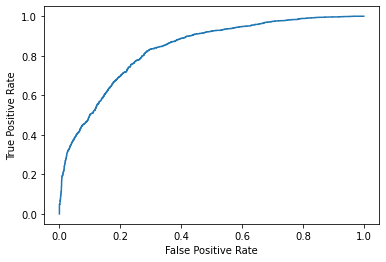

In [82]:
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [83]:
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
gmeans_nb

array([0.        , 0.02904964, 0.0355784 , ..., 0.0361669 , 0.02953015,
       0.        ])

In [84]:
thresholds_nb[np.argmax(gmeans_nb)]

0.32133033909163583

## 3. KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

In [86]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_knn.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.879.


In [87]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 3)
recall_knn = round(recall_score(y_test, y_pred_knn), 3)
precision_knn = round(precision_score(y_test, y_pred_knn), 3)
f1_knn = round(f1_score(y_test, y_pred_knn), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_knn}.")
print(f"The recall of KNeighborsClassifier is {recall_knn}.")
print(f"The precission of KNeighborsClassifier is {precision_knn}.")
print(f"The f1 of KNeighborsClassifier is {f1_knn}.")

The accuracy of KNeighborsClassifier is 0.836.
The recall of KNeighborsClassifier is 0.728.
The precission of KNeighborsClassifier is 0.776.
The f1 of KNeighborsClassifier is 0.752.


In [88]:
# Hyperparameter tuning
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

rs_knn = randomsearch_knn.fit(X_train_transformed, y_train)

print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 96}


In [89]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Fit the model with the best parameters
knn_best_model = knn_best.fit(X_train_transformed, y_train)
y_pred_knn_best = knn_best.predict(X_test_transformed)

See the results:

In [90]:
matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
matrix_knn

array([[4239,  348],
       [ 576, 1794]])

In [91]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn_best = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_knn_best.mean(), 3)}.")


accuracy_knn_best = round(accuracy_score(y_test, y_pred_knn_best), 3)
recall_knn_best = round(recall_score(y_test, y_pred_knn_best), 3)
precision_knn_best = round(precision_score(y_test, y_pred_knn_best), 3)
f1_knn_best = round(f1_score(y_test, y_pred_knn_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_knn_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_knn_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_knn_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_knn_best}.")

Cross-validation scores for KNeighborsClassifier: 0.921.
The accuracy of Gaussian Naive Bayes is 0.867.
The recall of Gaussian Naive Bayes is 0.757.
The precission of Gaussian Naive Bayes is 0.838.
The f1 of Gaussian Naive Bayes is 0.795.


In [92]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_best.predict_proba(X_test_transformed)[:,1])

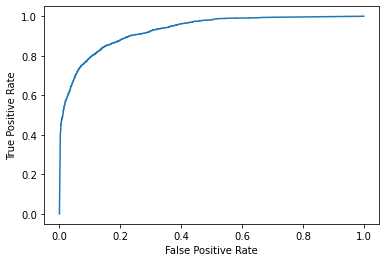

In [93]:
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [94]:
gmeans_knn = np.sqrt(tpr_knn*(1-fpr_knn))
gmeans_knn

array([0.        , 0.62647375, 0.63115648, ..., 0.51283391, 0.51135081,
       0.        ])

In [95]:
thresholds_knn[np.argmax(gmeans_knn)]

0.36432739544025317

## 4. RandomForestClassifier

In [96]:
rfc = RandomForestClassifier(random_state=1)

rfc_model = rfc.fit(X_train_transformed.toarray(), y_train)
y_pred_rfc = rfc.predict(X_test_transformed.toarray())

In [97]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc = cross_val_score(rfc, X_train_transformed.toarray(), y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for RandomForestClassifier: {round(cv_scores_rfc.mean(), 3)}.")

Cross-validation scores for RandomForestClassifier: 0.937.


In [98]:
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
recall_rfc = round(recall_score(y_test, y_pred_rfc), 3)
precision_rfc = round(precision_score(y_test, y_pred_rfc), 3)
f1_rfc = round(f1_score(y_test, y_pred_rfc), 3)

print(f"The accuracy of RandomForestClassifier is {accuracy_knn}.")
print(f"The recall of RandomForestClassifier is {recall_knn}.")
print(f"The precission of RandomForestClassifier is {precision_knn}.")
print(f"The f1 of RandomForestClassifier is {f1_knn}.")

The accuracy of RandomForestClassifier is 0.836.
The recall of RandomForestClassifier is 0.728.
The precission of RandomForestClassifier is 0.776.
The f1 of RandomForestClassifier is 0.752.


In [99]:
params_rfc = {"n_estimators": [200, 225, 275, 300], "max_depth": [None, 5, 10]}
gridsearch_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='roc_auc')

grid_rfc = gridsearch_rfc.fit(X_train_transformed, y_train)

print("Best parameters for RandomForestClassifier: ", gridsearch_rfc.best_params_)

Best parameters for RandomForestClassifier:  {'max_depth': None, 'n_estimators': 300}


In [100]:
# Hyperparameter tuning
rfc_best = RandomForestClassifier(**gridsearch_rfc.best_params_)

# Fit the models with the best parameters
rfc_best_model = rfc_best.fit(X_train_transformed.toarray(), y_train)
y_pred_rfc_best = nb_best.predict(X_test_transformed.toarray())

See the results:

In [101]:
matrix_rfc = confusion_matrix(y_test, y_pred_rfc_best)
matrix_rfc

array([[4212,  375],
       [1290, 1080]])

In [102]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc_best = cross_val_score(rfc_best, X_train_transformed.toarray(), y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_rfc_best.mean(), 3)}.")


accuracy_rfc_best = round(accuracy_score(y_test, y_pred_rfc_best), 3)
recall_rfc_best = round(recall_score(y_test, y_pred_rfc_best), 3)
precision_rfc_best = round(precision_score(y_test, y_pred_rfc_best), 3)
f1_rfc_best = round(f1_score(y_test, y_pred_rfc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_rfc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_rfc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_rfc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_rfc_best}.")

Cross-validation scores for KNeighborsClassifier: 0.938.
The accuracy of Gaussian Naive Bayes is 0.761.
The recall of Gaussian Naive Bayes is 0.456.
The precission of Gaussian Naive Bayes is 0.742.
The f1 of Gaussian Naive Bayes is 0.565.


In [103]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_best.predict_proba(X_test_transformed.toarray())[:,1])

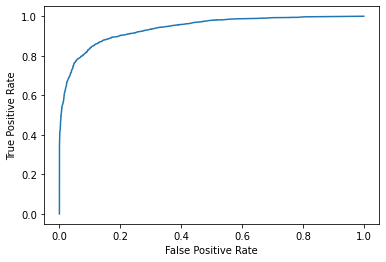

In [104]:
plt.plot(fpr_rfc,tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [105]:
gmeans_rfc = np.sqrt(tpr_rfc*(1-fpr_rfc))
gmeans_rfc

array([0.        , 0.45190642, 0.45376996, 0.47953916, 0.48085718,
       0.49597536, 0.49767391, 0.49809765, 0.50691422, 0.50774591,
       0.51311903, 0.52006166, 0.52087236, 0.53209244, 0.53288483,
       0.53761467, 0.53800695, 0.54463242, 0.5504122 , 0.55079536,
       0.55682939, 0.55758647, 0.56248263, 0.56993305, 0.57104223,
       0.57983929, 0.58020294, 0.58599065, 0.5906514 , 0.5910084 ,
       0.59768565, 0.60085269, 0.60120355, 0.60533202, 0.61046746,
       0.61562498, 0.61630938, 0.62107913, 0.62682216, 0.62749436,
       0.62783018, 0.63251305, 0.63284622, 0.6371615 , 0.63749224,
       0.64006213, 0.64137778, 0.64170627, 0.64360345, 0.64393073,
       0.64470038, 0.64756234, 0.65112842, 0.65138047, 0.65170349,
       0.65581667, 0.66078585, 0.66110407, 0.66483814, 0.66547042,
       0.66862283, 0.67356233, 0.67387438, 0.67760778, 0.67993654,
       0.68086309, 0.68424972, 0.68685781, 0.68716356, 0.68891975,
       0.68922451, 0.69256807, 0.69287123, 0.69574313, 0.69755

In [106]:
thresholds_rfc[np.argmax(gmeans_rfc)]

0.37705555555555553

## 5. SVC

In [54]:
svc = SVC(probability=True)

svc_model = svc.fit(X_train_transformed, y_train)
y_pred_svc = svc.predict(X_test_transformed)

In [55]:
# Cross-validation for SVC
cv_scores_svc = cross_val_score(svc, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for SVC: {round(cv_scores_svc.mean(), 3)}.")

Cross-validation scores for SVC: 0.897.


In [56]:
accuracy_svc = round(accuracy_score(y_test, y_pred_svc), 3)
recall_svc = round(recall_score(y_test, y_pred_svc), 3)
precision_svc = round(precision_score(y_test, y_pred_svc), 3)
f1_svc = round(f1_score(y_test, y_pred_svc), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_svc}.")
print(f"The recall of KNeighborsClassifier is {recall_svc}.")
print(f"The precission of KNeighborsClassifier is {precision_svc}.")
print(f"The f1 of KNeighborsClassifier is {f1_svc}.")

The accuracy of KNeighborsClassifier is 0.842.
The recall of KNeighborsClassifier is 0.717.
The precission of KNeighborsClassifier is 0.799.
The f1 of KNeighborsClassifier is 0.756.


In [58]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='roc_auc')
rs_svc.fit(X_train_transformed, y_train)
rs_svc.best_estimator_

SVC(kernel='poly', probability=True)

In [59]:
# Hyperparameter tuning
svc_best = SVC(**rs_svc.best_params_, probability=True)

# Fit the models with the best parameters
svc_best_model = svc_best.fit(X_train_transformed, y_train)
y_pred_svc_best = svc_best.predict(X_test_transformed)

In [60]:
matrix_svc = confusion_matrix(y_test, y_pred_svc_best)
matrix_svc

array([[4164,  423],
       [ 662, 1708]])

In [61]:
# Cross-validation for RandomForestClassifier
cv_scores_svc_best = cross_val_score(svc_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for SVC: {round(cv_scores_svc_best.mean(), 3)}.")


accuracy_svc_best = round(accuracy_score(y_test, y_pred_svc_best), 3)
recall_svc_best = round(recall_score(y_test, y_pred_svc_best), 3)
precision_svc_best = round(precision_score(y_test, y_pred_svc_best), 3)
f1_svc_best = round(f1_score(y_test, y_pred_svc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_svc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_svc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_svc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_svc_best}.")

Cross-validation scores for SVC: 0.898.
The accuracy of Gaussian Naive Bayes is 0.844.
The recall of Gaussian Naive Bayes is 0.721.
The precission of Gaussian Naive Bayes is 0.802.
The f1 of Gaussian Naive Bayes is 0.759.


In [62]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_best.predict_proba(X_test_transformed)[:,1])

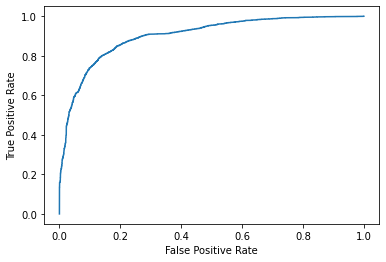

In [63]:
plt.plot(fpr_svc,tpr_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [64]:
gmeans_svc = np.sqrt(tpr_svc*(1-fpr_svc))
gmeans_svc

array([0.        , 0.0205412 , 0.04593152, ..., 0.02556846, 0.02557386,
       0.        ])

In [65]:
thresholds_svc[np.argmax(gmeans_svc)]

0.33057548190963243

# Part 6: Model Evaluation

## Accuracy

Generate a dataframe including all the results.

In [107]:
data = {'Model': ['LogisticRegression', 'Gaussian Naive Bayes', 'KNeighborsClassifier', 'RandomForestClassifier','SVC'],
        'Accuracy': [accuracy_log, accuracy_nb_best, accuracy_knn_best, accuracy_rfc_best, accuracy_svc_best],
        'Recall': [recall_log, recall_nb_best, recall_knn_best, recall_rfc_best, recall_svc_best],
        'Precision': [precision_log, precision_nb_best, precision_knn_best, precision_rfc_best, precision_svc_best],
        'F1': [f1_log, f1_nb_best, f1_knn_best, f1_rfc_best, f1_svc_best]}

results = pd.DataFrame(data)
results

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression,0.792,0.611,0.733,0.667
1,Gaussian Naive Bayes,0.761,0.456,0.742,0.565
2,KNeighborsClassifier,0.867,0.757,0.838,0.795
3,RandomForestClassifier,0.761,0.456,0.742,0.565
4,SVC,0.844,0.721,0.802,0.759


## ROC curve

Plot the four roc curve figures into a 2x3 grid.

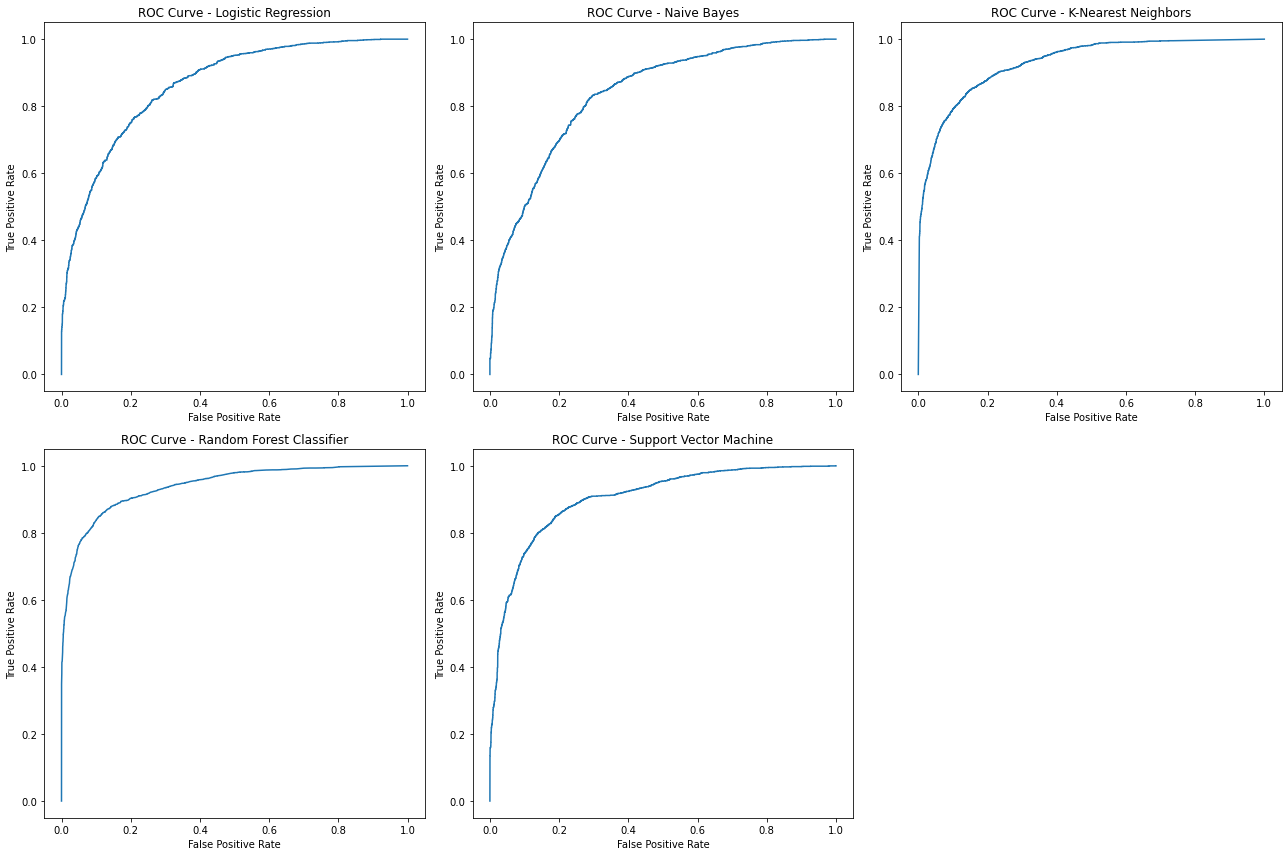

In [108]:
plt.figure(figsize=(18, 12))

# Plot ROC curve for Logistic Regression
plt.subplot(2, 3, 1)
plt.plot(fpr_log, tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')

# Plot ROC curve for Naive Bayes
plt.subplot(2, 3, 2)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')

# Plot ROC curve for K-Nearest Neighbors
plt.subplot(2, 3, 3)
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')

# Plot ROC curve for Random Forest Classifier
plt.subplot(2, 3, 4)
plt.plot(fpr_rfc, tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')

# Plot ROC curve for Support Vector Machine
plt.subplot(2, 3, 5)  # New subplot added
plt.plot(fpr_svc, tpr_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**From above results, KNeighborsClassifier has the highest accuracy, recall, precision, and f1 scores; and the best roc curve. Therefore, we choose KNeighborsClassifier.**

## Confusion Matirx

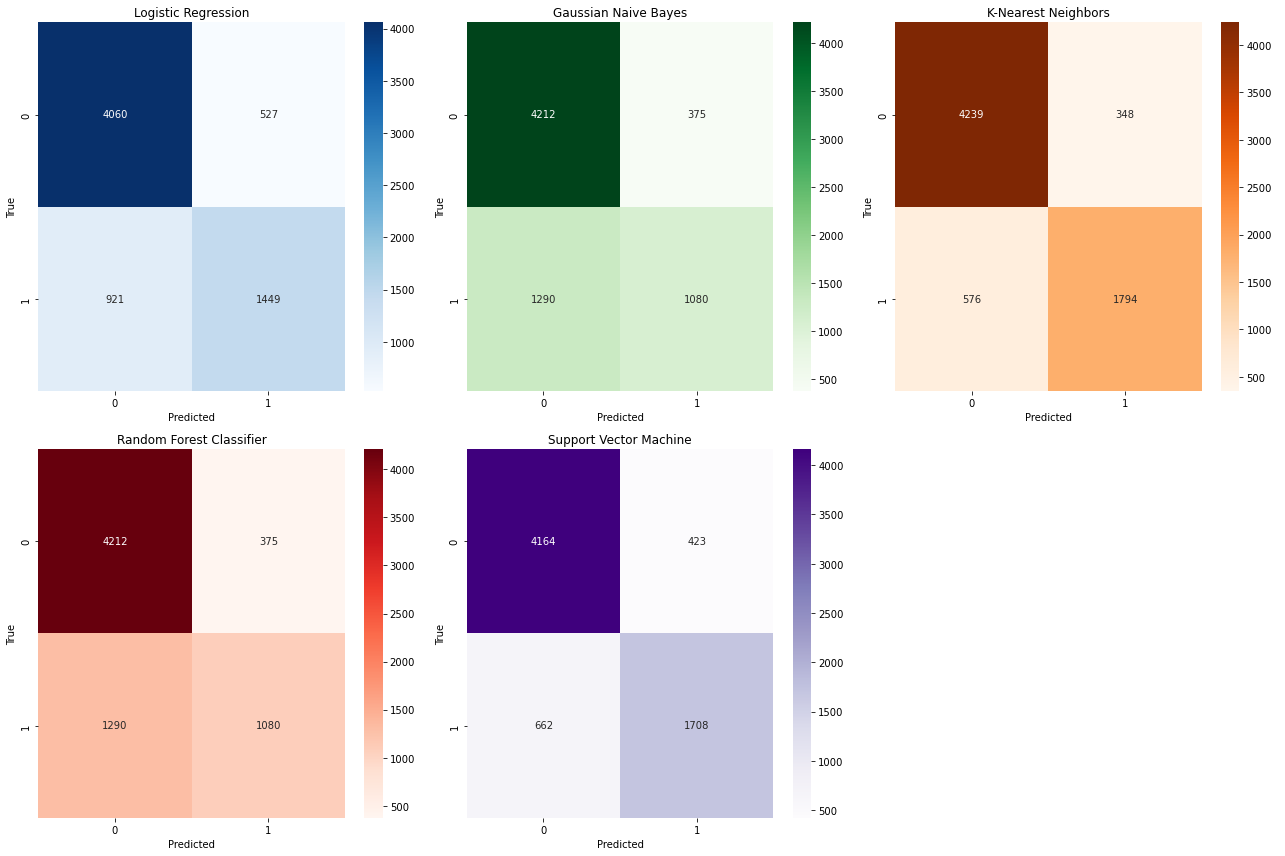

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion Matrix for Logistic Regression
sns.heatmap(matrix_log, annot=True, cmap="Blues", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("True")

# Confusion Matrix for Gaussian Naive Bayes
sns.heatmap(matrix_nb, annot=True, cmap="Greens", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Gaussian Naive Bayes")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("True")

# Confusion Matrix for K-Nearest Neighbors
sns.heatmap(matrix_knn, annot=True, cmap="Oranges", fmt="d", ax=axes[0, 2])
axes[0, 2].set_title("K-Nearest Neighbors")
axes[0, 2].set_xlabel("Predicted")
axes[0, 2].set_ylabel("True")

# Confusion Matrix for Random Forest Classifier
sns.heatmap(matrix_rfc, annot=True, cmap="Reds", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Random Forest Classifier")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("True")

# Confusion Matrix for Support Vector Machine
sns.heatmap(matrix_svc, annot=True, cmap="Purples", fmt="d", ax=axes[1, 1])  # New subplot added
axes[1, 1].set_title("Support Vector Machine")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("True")


axes[1, 2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Feature Importance

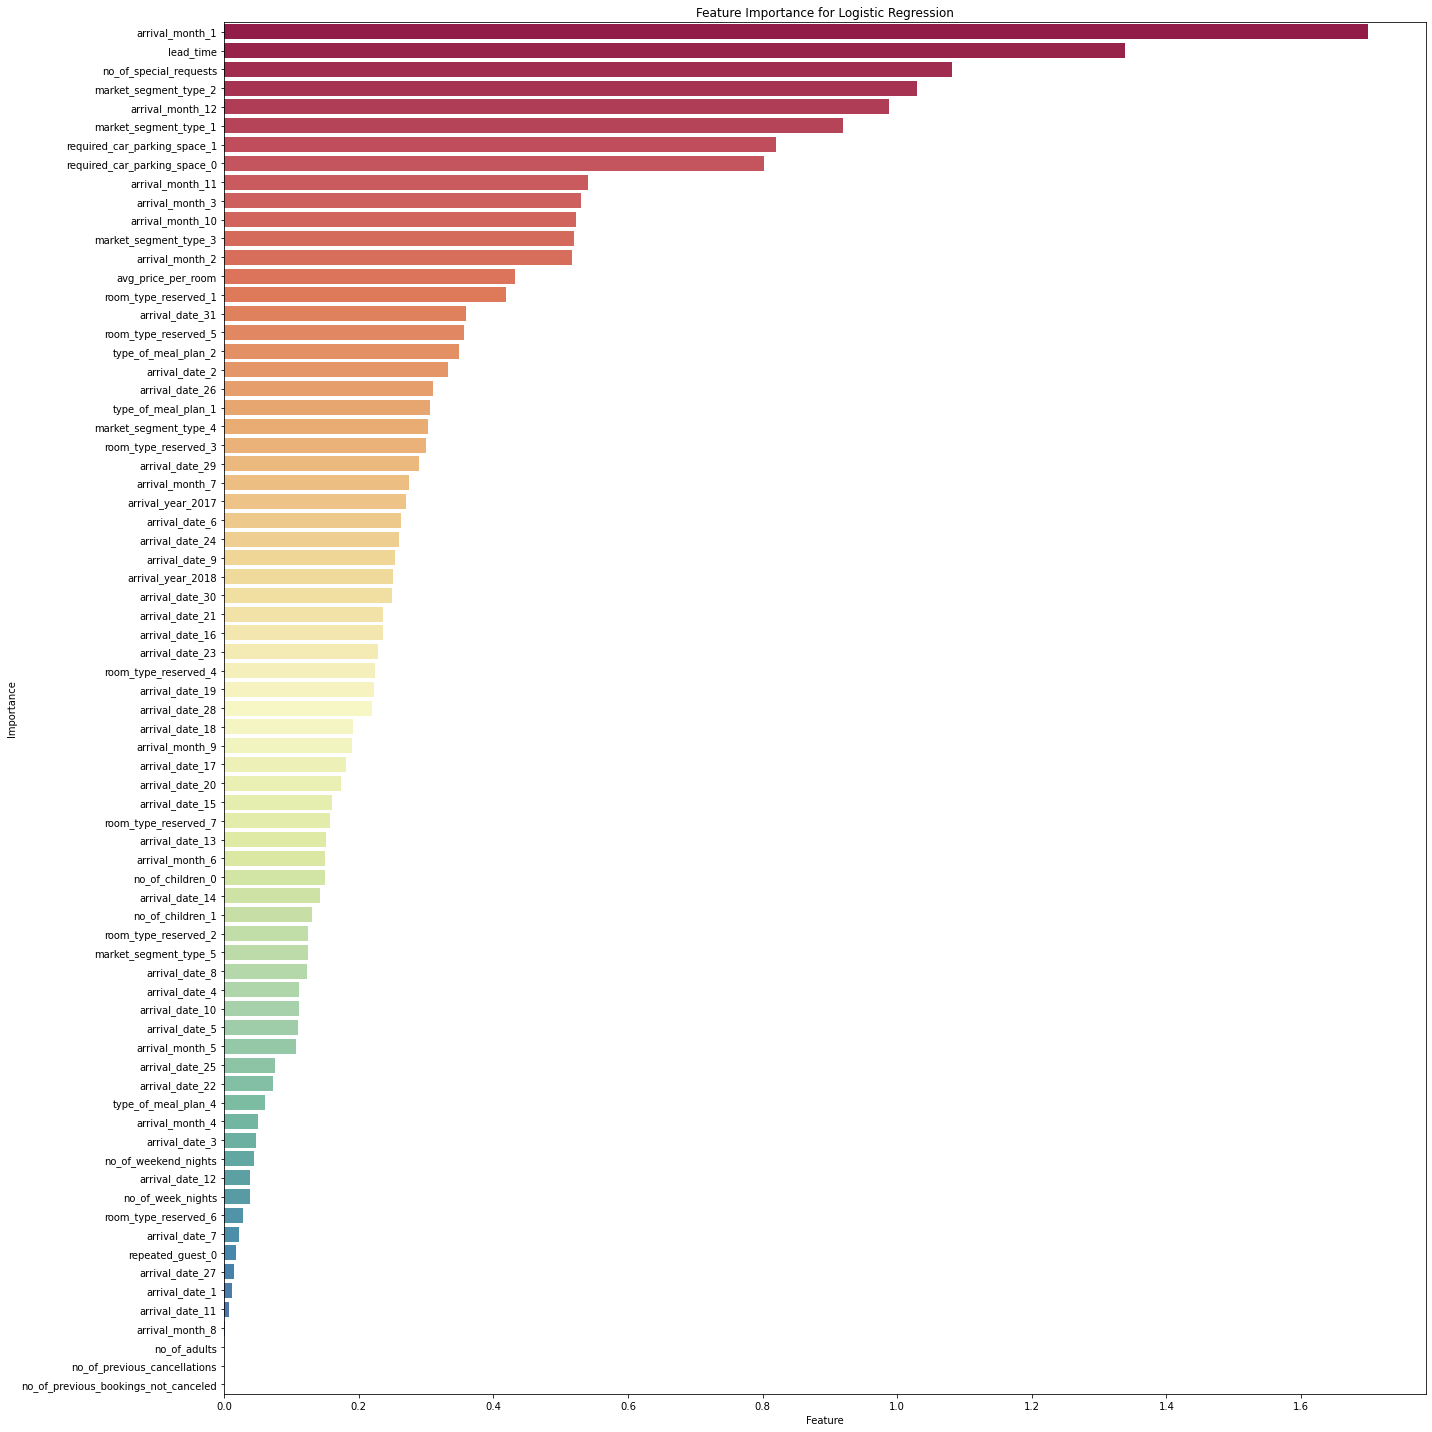

In [111]:
# LogisticRegression
coefficients = log.coef_[0]

cat_cols_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat).tolist()

# Combine the encoded categorical columns with the numerical columns
feature_names = cat_cols_encoded + num

# Create a dictionary to store the feature importance scores
feature_importance = dict(zip(feature_names, np.abs(coefficients)))

# Sort the dictionary by the absolute value of the coefficients in descending order
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True))

# Create lists to store feature names and importance scores for plotting
features_plot = []
importance_plot = []

# Iterate over the sorted feature importance dictionary and store the data in the lists
for feature, importance in sorted_feature_importance.items():
    features_plot.append(feature)
    importance_plot.append(importance)

# Plot the feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x=importance_plot, y=features_plot, palette="Spectral")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Logistic Regression")
plt.tight_layout()
plt.show()

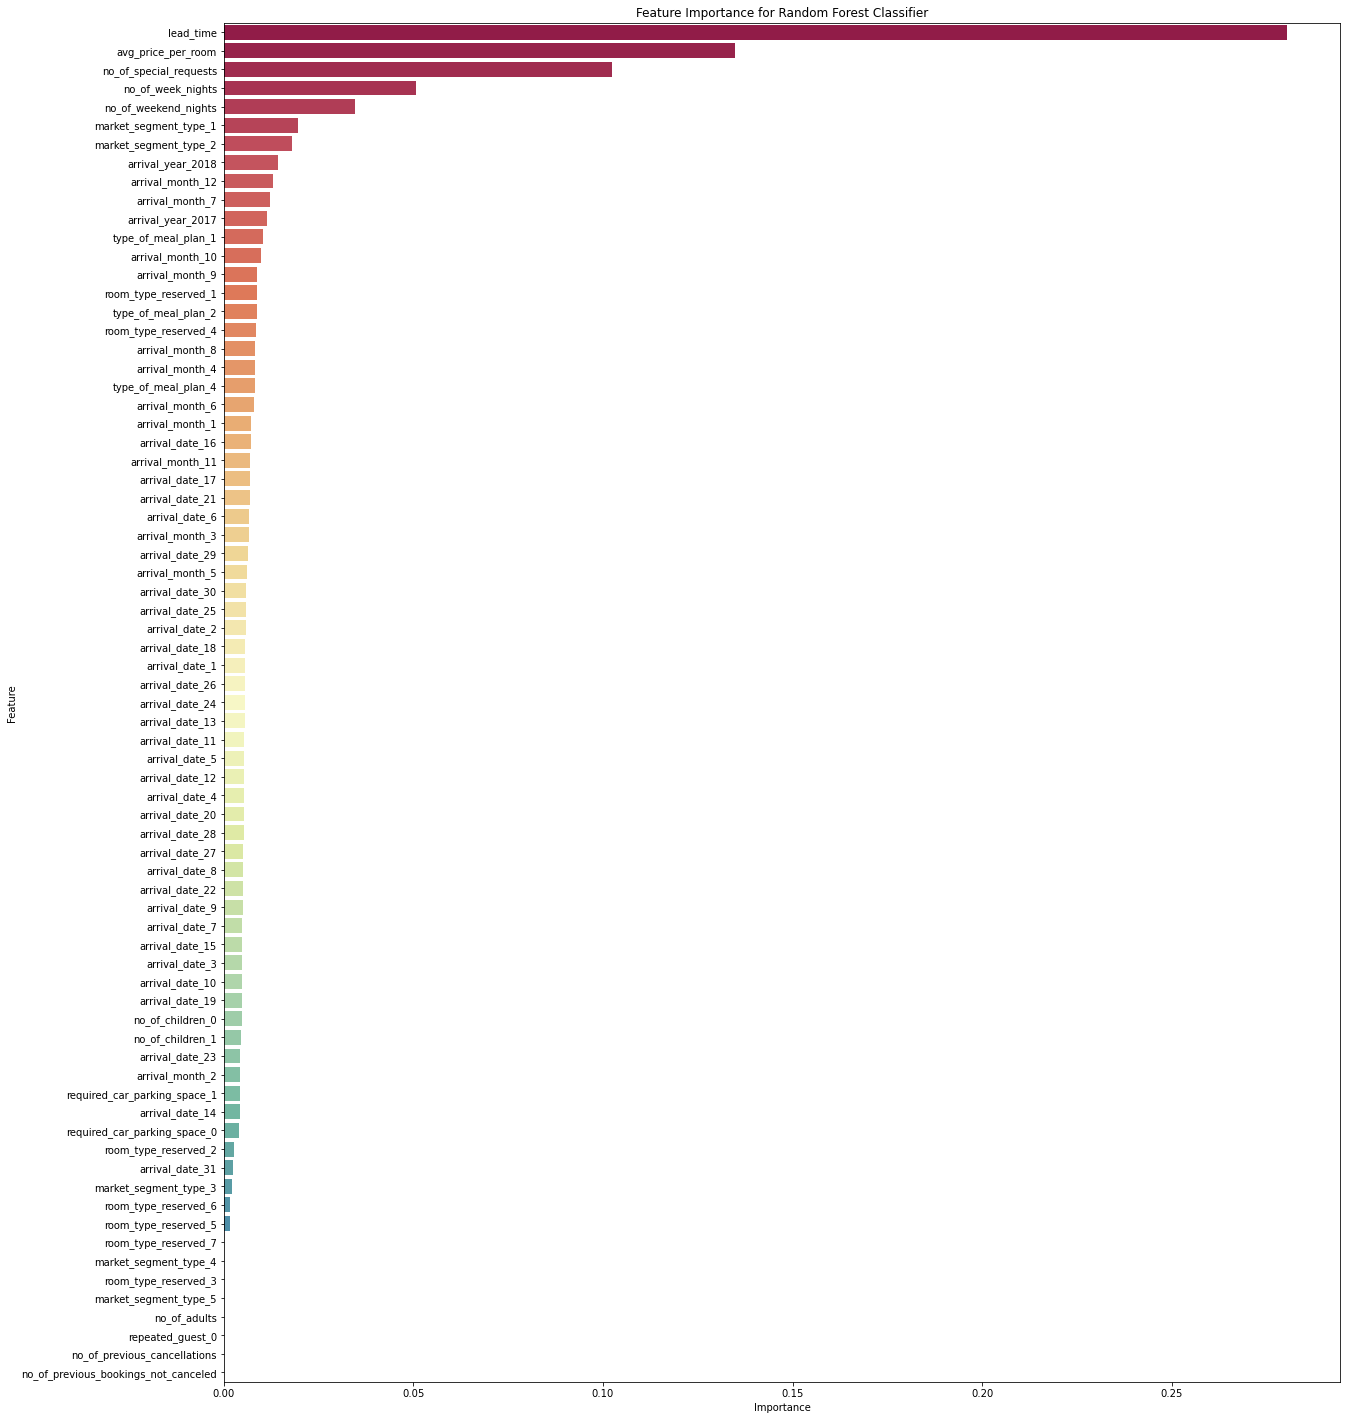

In [112]:
# rfc - feature importance
# Retrieve the feature importances
feature_importance_rfc = rfc_best.feature_importances_

# Initialize a DataFrame with feature names and the corresponding importance values
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_rfc}).sort_values(by="Importance", ascending=False)

# Set the figure size and layout
plt.figure(figsize=(20,25))
plt.tight_layout(pad=2.0)

# Plot the feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h", palette="Spectral")

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")

plt.show()
